# Krížová validácia
Aký je problém s týmto riešením? 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

In [7]:
df = pd.read_csv("processed_data/numerical.csv", index_col="EmployeeID")
X = df[df.columns.difference(['Attrition_num'])]
y = df['Attrition_num']

0.9247434435575826
0.8428997937248941
0.8428997937248941
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       755
           1       0.73      0.73      0.73       122

    accuracy                           0.92       877
   macro avg       0.84      0.84      0.84       877
weighted avg       0.92      0.92      0.92       877



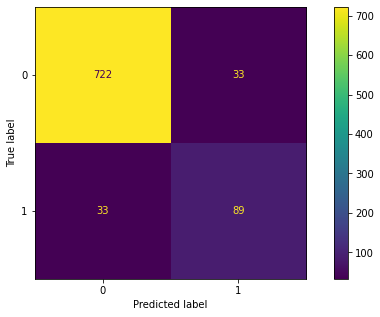

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

plt.rcParams['figure.figsize'] = 10, 5

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

print(classification_report(y_test,y_pred))
plot_confusion_matrix(neigh, X_test, y_test)

__Pretrénovanie__ (overfitting) je stav kedy sa klasifikátor prispôsobí na testovaciu vzorku. V tomto stave namusí byť užitoční pre predikciu v praxi.

# 1 validačná vzorka
Vezmeme trénovaciu sadu rozdelíme ju 80 na 20 a klasifikátor optimalizujeme na validačnéj vzorke. Tento prístup je veľmi jednoduchý no môže mať viacero problémov. Jeden z najväčších je že nemusíme mať dostatočne veľa dát. 

# 2 Krížová validácia (cross validation)
<img src="assets/cross_validation.png" width="500" height="500">

[Zdroj obrázku](https://scikit-learn.org/stable/modules/cross_validation.html)

# K-fold corss validation
Vytvoríme k takýchto skupín

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neigh, X_train, y_train, cv=5) # default f1_micro pre knn
scores

array([0.87161198, 0.86590585, 0.88873039, 0.85734665, 0.86447932])

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neigh, X_train, y_train, cv=5, scoring="f1_macro")
scores

array([0.76757294, 0.74660052, 0.78492873, 0.70840266, 0.75032337])

__Základom je nepoužívať testovaciu sadu pri porovnávaní klasifikátorov__ (testovacia sada má odzrkadľovať skutočný život, kde dáta nikdy vopred nepoznáme)

# Leave one out
Máme vždy n skupín kde n je počet pozorovaní. V tomto prípade je trénovanie na všetkých dát okrem toho jedného pozorvania na ktorom to vyhodnocujeme. 

In [10]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

X=X_train.values
y=y_train.values

y_pred=[]
y_true=[]


for train_index, test_index in loo.split(X[:10]):
    print(train_index, test_index)
    neigh = KNeighborsClassifier(n_neighbors=3)
    X_temp_train, X_temp_test = X[train_index], X[test_index]
    y_temp_train, y_temp_test = y[train_index], y[test_index]
    neigh.fit(X_temp_train, y_temp_train)
    y_pred_one=neigh.predict(X_temp_test)
    y_pred.append(y_pred_one[0])
    y_true.append(y_temp_test[0])

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [12]:
y_true

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# 3 Stratifikovane prístupy
Niekedy chceme aby sa v každom fold zachoval relatívny počet pozorvaní pre kaźdú triedu. Predchádzajúce prístupy len nakrájajú dataset ako koláč. Stratifikované prístupy však toto rozloženie zaručujú. Príklady:
- Stratiffied K-fold
- Straytiffied Leave P Out 